<a href="https://colab.research.google.com/github/SoheliPaul/Machine-Learning/blob/main/2348561_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/Program_1_Dataset - Program_1_Dataset.csv")

In [ ]:
df.head()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
0,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2
1,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
2,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5
3,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
4,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3


In [ ]:
df.shape

(506, 14)

In [ ]:
df.describe()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
df.isna().sum()

Crime_Rate          0
Zone_proportion     0
Non_Retail_Acres    0
CHAS                0
NOX                 0
Avg_rooms           0
AGE                 0
Distance            0
RAD                 0
Property_TaxRate    0
PTRATIO             0
B                   0
LSTAT               0
MValue              0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Crime_Rate        506 non-null    float64
 1   Zone_proportion   506 non-null    float64
 2   Non_Retail_Acres  506 non-null    float64
 3   CHAS              506 non-null    int64  
 4   NOX               506 non-null    float64
 5   Avg_rooms         506 non-null    float64
 6   AGE               506 non-null    float64
 7   Distance          506 non-null    float64
 8   RAD               506 non-null    int64  
 9   Property_TaxRate  506 non-null    int64  
 10  PTRATIO           506 non-null    float64
 11  B                 506 non-null    float64
 12  LSTAT             506 non-null    float64
 13  MValue            506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
df.nunique()

Crime_Rate          504
Zone_proportion      26
Non_Retail_Acres     76
CHAS                  2
NOX                  81
Avg_rooms           446
AGE                 356
Distance            412
RAD                   9
Property_TaxRate     66
PTRATIO              46
B                   357
LSTAT               455
MValue              229
dtype: int64

In [ ]:
df["MValue"].value_counts()

50.0    16
25.0     8
23.1     7
22.0     7
21.7     7
        ..
17.6     1
25.1     1
48.3     1
41.7     1
12.6     1
Name: MValue, Length: 229, dtype: int64

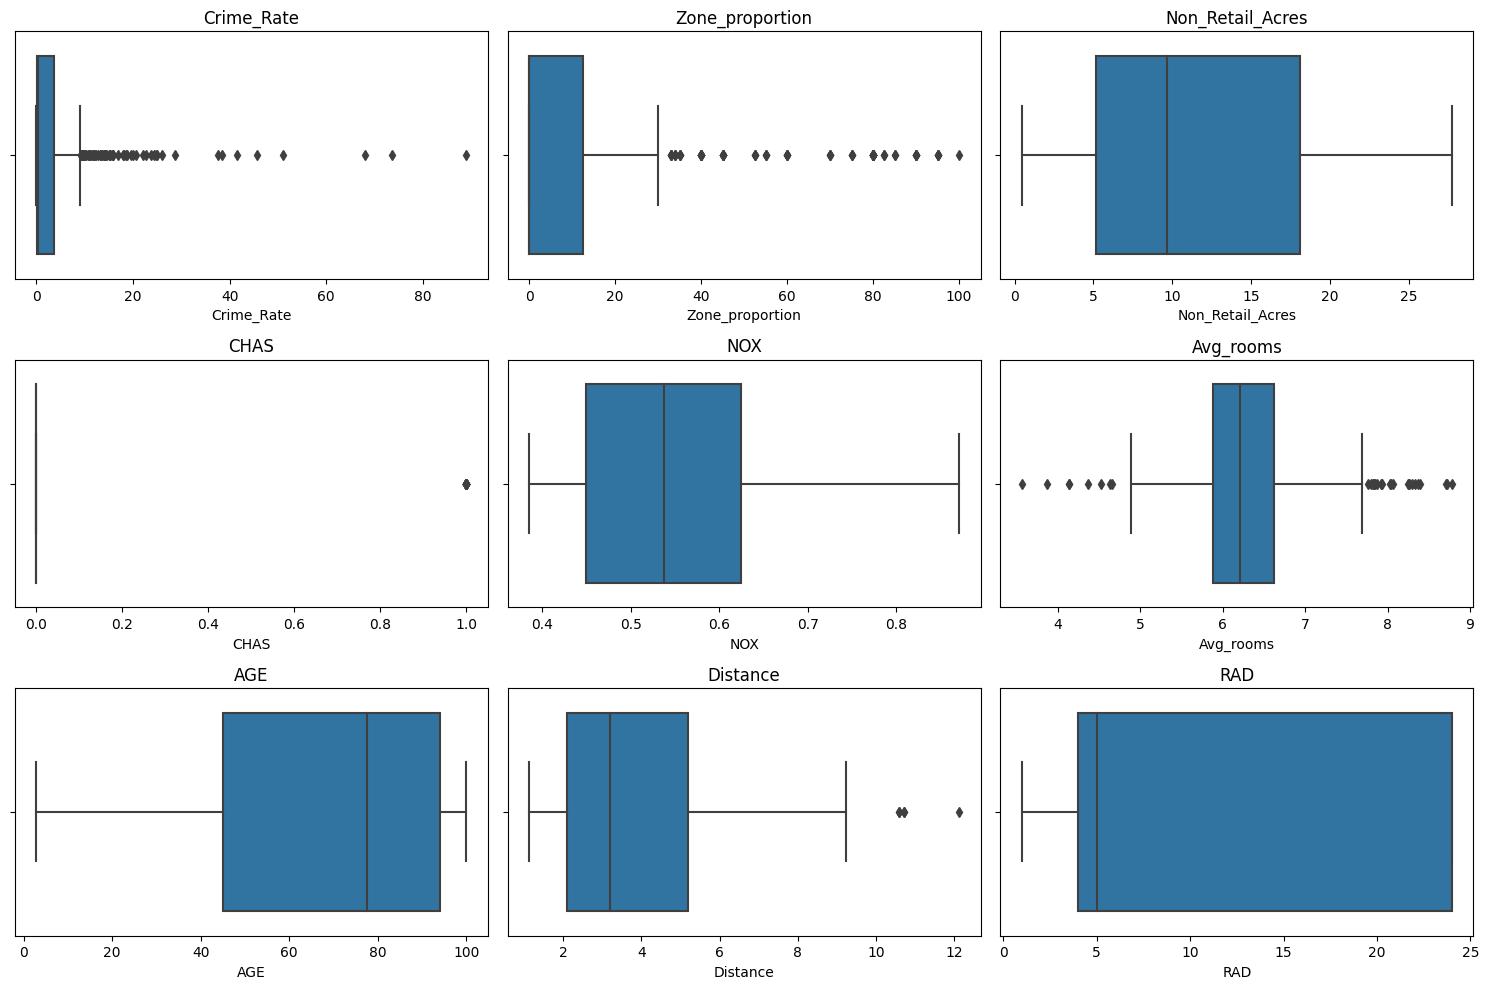

In [ ]:
#outliers detection
int_vars = df.select_dtypes(include = ['int','float'])

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
axs = axs.flatten()

for i, var in enumerate (int_vars.columns[:len(axs)]):
    sns.boxplot(x=var,data=df,ax=axs[i])
    axs[i].set_title(var)

plt.tight_layout()
plt.show()

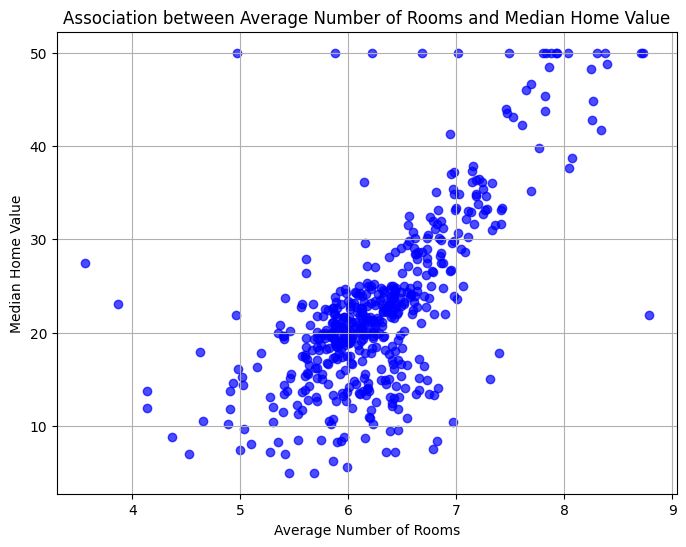

In [ ]:
X = df['Avg_rooms']
y = df['MValue']

# Plotting the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.7, color='blue')
plt.title('Association between Average Number of Rooms and Median Home Value')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median Home Value')
plt.grid(True)
plt.show()

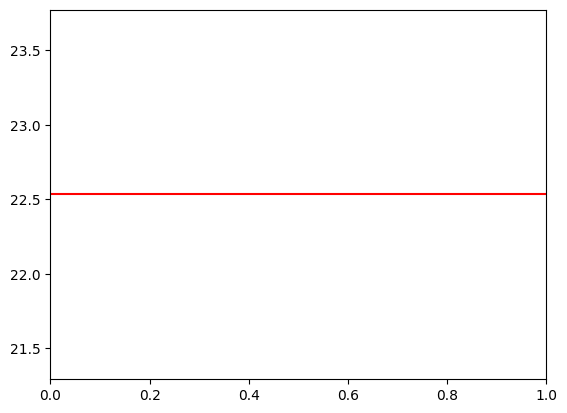

In [ ]:
m=df['MValue'].mean()
m
plt.axhline(y=m,color="red")

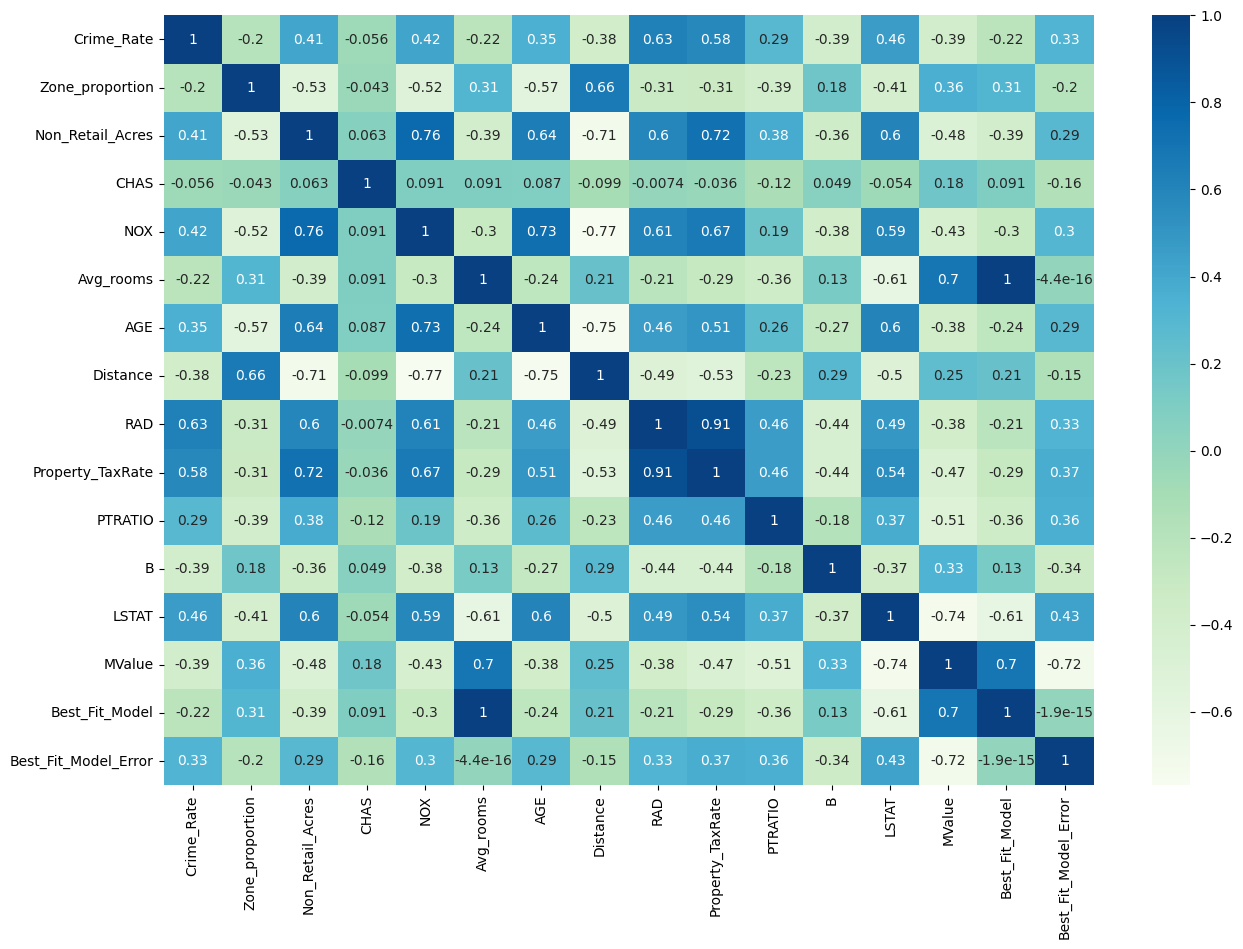

In [ ]:
#co_relation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),fmt='.2g',annot=True,cmap='GnBu')
plt.show()

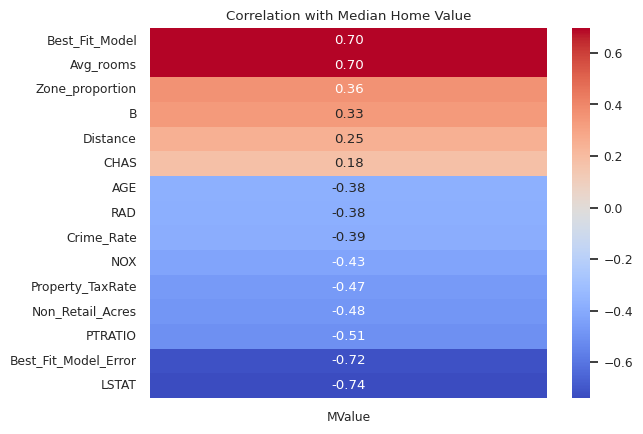

In [ ]:
corr = df.corr()
target_corr = corr['MValue'].drop('MValue')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

# Create a heatmap of the correlations with the target column
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Median Home Value')
plt.show()

Positive and Moderately Strong Relationship:

The correlation coefficient of 0.70 indicates a positive linear relationship between the average number of rooms in a house and its corresponding median home value.
As the number of rooms increases, there tends to be a tendency for the median home value to increase.

Impact on Home Value:

A correlation of 0.70 suggests that around 49% (0.70 squared) of the variability in median home values can be explained by the average number of rooms.
It implies that 'Avg_rooms' is a significant factor influencing the 'MValue'.

Potential Predictive Power:

With a strong positive correlation, 'Avg_rooms' might be a good predictor of 'MValue' in the context of a linear relationship.

In [ ]:
x = df['Avg_rooms']
y = df['MValue']
xy = x*y
n = len(df)
xmean = df['Avg_rooms'].mean()
ymean = df['MValue'].mean()
num = xy.sum() - n*xmean*ymean
den = (x**2).sum() - n*(xmean**2)
m = num/den
c = ymean - m*xmean
print("Intercept:",c,",Slope:",m)

Intercept: -34.67062077643849 ,Slope: 9.102108981180297


Simple Linear Regression:

Model Equation:

y
​
 =β
0
​
 +β
1
​
 ⋅x

y
​
 : Predicted value (dependent variable)

x: Predictor variable (independent variable)


β
0
​
 : Intercept (constant term)

β
1
​
 : Coefficient (slope)

Assumptions of Linear Regression:

Linear relationship between predictors and target.

No or little multicollinearity among predictors.

Homoscedasticity (constant variance of residuals).

Independence of residuals.

Normally distributed residuals.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df[['Avg_rooms']]  # Predictor variable
y = df['MValue']  # Target variable

# Split the data into training and test sets (70:30 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the linear regression model using the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting the target variable using the test dataset
predictions = model.predict(X_test)

In [ ]:
df["Best_Fit_Model"] = m*df["Avg_rooms"] + c

In [ ]:
df["Best_Fit_Model_Error"] = df["Best_Fit_Model"] - df["MValue"]

Text(0.5, 1.0, 'Best Fit Model')

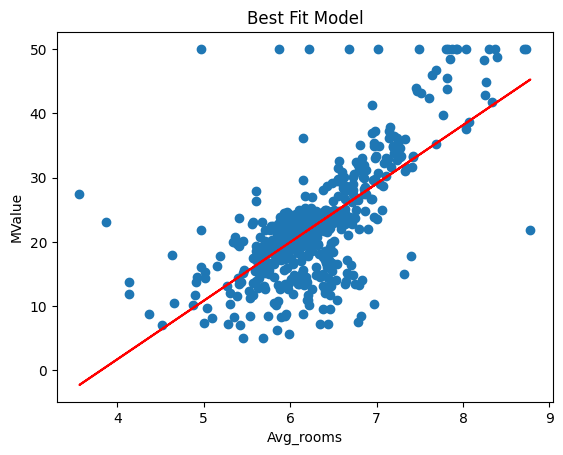

In [ ]:
fig, ax = plt.subplots()
ax.scatter("Avg_rooms","MValue",data=df,label="Median Value")
ax.plot(df["Avg_rooms"],df["Best_Fit_Model"],color="red",label="Best Fit Model")
ax.set_xlabel("Avg_rooms")
ax.set_ylabel("MValue")
ax.set_title("Best Fit Model")

MSE =
Σ(yi − pi)2
/
n


R
2
=
1
−
(sum squared regression (SSR)/
total sum of squares (SST))
,

=
1
−
(
∑
(
y
i
−
p
i
)
2
/
∑
(
y
i
−
y_mean
)
2
).


where yi is the ith observed value, pi is the corresponding predicted value for yi, and n is the number of observations. The Σ indicates that a summation is performed over all values of i.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Assuming the model is already trained and you have predictions and test sets

# Calculate mean squared error on training and testing datasets
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print("Mean Squared Error on Training Set:", train_mse)
print("Mean Squared Error on Testing Set:", test_mse)

# Calculate R-squared value on training and testing datasets
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

print("R-squared on Training Set:", train_r2)
print("R-squared on Testing Set:", test_r2)

Mean Squared Error on Training Set: 47.81170547959663
Mean Squared Error on Testing Set: 33.853804802145724
R-squared on Training Set: 0.46176397399316227
R-squared on Testing Set: 0.5424461839891813


In [ ]:
model.score(X_test,y_test)

0.5424461839891813

The intercept (
β
0 )
represents the value of the predicted target variable when all predictor variables are zero.

Coefficients (
β
1
​
 ) indicate the change in the target variable for a unit change in the predictor variable.

In [ ]:
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [8.92620222]
Intercept: -33.510147597513345



The evaluation metrics for the Linear Regression model on the training and testing datasets are as follows:

Mean Squared Error (MSE):

Training Set: 47.81
Testing Set: 33.85
The MSE on the testing set (33.85) is lower than on the training set (47.81), indicating better performance on the testing set, but it's important to note that the values are relatively high, suggesting potential for improvement in predictive accuracy.
R-squared (R2):

Training Set: 0.462
Testing Set: 0.542
The R-squared value on the testing set (0.542) is higher than on the training set (0.462). An R-squared closer to 1 indicates a better fit of the model to the data.

Mean Squared Error (MSE):

The MSE on the testing set (33.85) being lower than the MSE on the training set (47.81) suggests that the model might generalize reasonably well to unseen data, although the absolute values of MSE are relatively high, indicating some level of prediction error.

R-squared (R2):

The R-squared value on the testing set (0.542) being higher than on the training set (0.462) implies that the model performs slightly better in explaining the variance in the target variable for the testing dataset. However, the overall R-squared values indicate that the model explains around 46% to 54% of the variance in the target variable, leaving room for improvement.
Inference:

The model, while showing some ability to predict the median home values based on the average number of rooms, doesn't fully capture the variability in the target variable.
The relatively moderate R-squared values suggest that there are other factors beyond the average number of rooms that contribute significantly to determining the median home values.
It might be beneficial to consider additional features or more complex models to improve predictive accuracy, as the current model's performance might be limited by the simplicity of using only one predictor variable.
Additionally, investigating multicollinearity among features, addressing potential outliers, and exploring different regression techniques or ensemble methods could lead to a more robust model.